In [42]:
import tensorflow as tf

Because we love it!

In [43]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


MNIST is one of the most widely used dataset consisting of handwritten digits from 0-9.

Our logistic regression model would predict the digit from the image.

In [44]:
learning_rate = 0.01
training_epochs = 25
batch_size = 100

Setting hyper Parameters.

In [45]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes
cost_list = []
accuracy_list = []
# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

The graph input is kept in placeholder. The weight and the biases are graph variables.

In [46]:
pred = tf.nn.softmax(tf.matmul(x, W) + b) 
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

The model consists of softmax activation function. We train the model by minimizing the cost function by gradient descent optimizer.

In [47]:
with tf.Session() as sess:

    sess.run(init)

    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        cost_list.append(avg_cost)
        print("Epoch:", (epoch+1), "cost=", "{:.3f}".format(avg_cost))
        
        #Testing the model
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        accuracy_list.append(accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
        print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 1 cost= 1.184
Accuracy: 0.856
Epoch: 2 cost= 0.665
Accuracy: 0.8749
Epoch: 3 cost= 0.553
Accuracy: 0.8826
Epoch: 4 cost= 0.499
Accuracy: 0.8871
Epoch: 5 cost= 0.466
Accuracy: 0.8915
Epoch: 6 cost= 0.443
Accuracy: 0.8953
Epoch: 7 cost= 0.426
Accuracy: 0.8977
Epoch: 8 cost= 0.412
Accuracy: 0.9
Epoch: 9 cost= 0.401
Accuracy: 0.901
Epoch: 10 cost= 0.392
Accuracy: 0.9026
Epoch: 11 cost= 0.385
Accuracy: 0.9038
Epoch: 12 cost= 0.378
Accuracy: 0.9065
Epoch: 13 cost= 0.372
Accuracy: 0.9072
Epoch: 14 cost= 0.367
Accuracy: 0.9074
Epoch: 15 cost= 0.363
Accuracy: 0.9083
Epoch: 16 cost= 0.359
Accuracy: 0.9089
Epoch: 17 cost= 0.355
Accuracy: 0.9099
Epoch: 18 cost= 0.351
Accuracy: 0.9103
Epoch: 19 cost= 0.348
Accuracy: 0.9108
Epoch: 20 cost= 0.345
Accuracy: 0.9113
Epoch: 21 cost= 0.343
Accuracy: 0.9125
Epoch: 22 cost= 0.340
Accuracy: 0.9128
Epoch: 23 cost= 0.338
Accuracy: 0.9128
Epoch: 24 cost= 0.336
Accuracy: 0.9133
Epoch: 25 cost= 0.334
Accuracy: 0.9138


The previous session trains the model with batches of image.

finally testing the model with accuracy prediction.

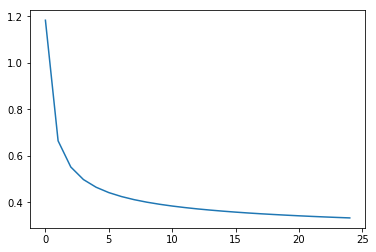

In [48]:
import matplotlib.pyplot as plt
plt.plot(cost_list)
plt.show()